In [30]:
import pandas as pd

# Data import
with pd.HDFStore('MiningProcess_Flotation_Plant_Database_train_split.h5') as store:
    X_cal = store.get('X_cal')
    Y_cal = store.get('Y_cal')
    X_test = store.get('X_test')
    Y_test = store.get('Y_test')


# TEMPLATE for model usage and calibration

n_comp=1, Q2=-0.652, RMSE=1.180, R2X=0.141, R2Y=-2800.041
n_comp=2, Q2=-0.554, RMSE=1.144, R2X=0.339, R2Y=-2690.479
n_comp=3, Q2=-0.512, RMSE=1.129, R2X=0.449, R2Y=-17095.303
n_comp=4, Q2=-0.516, RMSE=1.130, R2X=0.587, R2Y=-9841.826
n_comp=5, Q2=-0.505, RMSE=1.126, R2X=0.639, R2Y=-1179.165
n_comp=6, Q2=-0.506, RMSE=1.127, R2X=0.671, R2Y=-7996.160
n_comp=7, Q2=-0.513, RMSE=1.129, R2X=0.736, R2Y=-5174.123
n_comp=8, Q2=-0.521, RMSE=1.132, R2X=0.759, R2Y=-5190.510
n_comp=9, Q2=-0.531, RMSE=1.136, R2X=0.782, R2Y=-10835.280
n_comp=10, Q2=-0.557, RMSE=1.145, R2X=0.811, R2Y=-10765.983
n_comp=11, Q2=-0.558, RMSE=1.146, R2X=0.848, R2Y=-11610.056
n_comp=12, Q2=-0.558, RMSE=1.146, R2X=0.867, R2Y=-8878.017
n_comp=13, Q2=-0.559, RMSE=1.146, R2X=0.882, R2Y=-7064.717
n_comp=14, Q2=-0.563, RMSE=1.148, R2X=0.896, R2Y=-12085.936
n_comp=15, Q2=-0.550, RMSE=1.143, R2X=0.908, R2Y=-10105.041
n_comp=16, Q2=-0.562, RMSE=1.147, R2X=0.918, R2Y=-10895.039
n_comp=17, Q2=-0.580, RMSE=1.154, R2X=0.930, R2Y=-11216.54

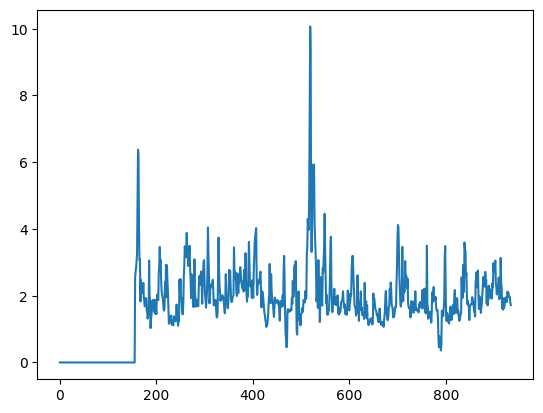

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import root_mean_squared_error

n_features = X_test.shape[1]

def optimise_pls_cv(X, y, n_comp):

    model = make_pipeline(StandardScaler(),PLSRegression(n_components=n_comp)) # Pipeline ensures scaling compatibility with crossval
    y_v = cross_val_predict(model, X, y, cv=5)

    mse = mean_squared_error(y, y_cv)

def optimise_pls_cv(X, y, n_comp, n_splits=5):
    X = X.values
    y = y.values
    
    model = make_pipeline(StandardScaler(), PLSRegression(n_components=n_comp))
    tscv = TimeSeriesSplit(n_splits=n_splits)
    tscv = CrossVal
    y_cv = np.zeros_like(y) 
    for fold_idx, (train_index, test_index) in enumerate( tscv.split(X) ):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_cv[ test_index ] = model.predict(X_test).flatten()
        
    
    mse = root_mean_squared_error(y, y_cv)  # RMSE
    
    tss = np.sum((y - np.mean(y)) ** 2)
    press = np.sum((y - y_cv) ** 2)
    q2 = 1 - press / tss
    
    # Calculate R2X and R2Y
    model.fit(X, y)
    pls = model.named_steps['plsregression']
    X_scaled = model.named_steps['standardscaler'].transform(X)
    
    # R2X: Explained variance in X
    X_score = pls.x_scores_
    X_loadings = pls.x_loadings_
    X_reconstructed = np.dot(X_score, X_loadings.T)
    r2x = 1 - np.sum((X_scaled - X_reconstructed) ** 2) / np.sum(X_scaled ** 2)
    
    # R2Y: Explained variance in Y
    r2y = pls.score(X, y)
    
    return y_cv, q2, mse, r2x, r2y


n_splits = 5
y_cv, q2, mse, r2x, r2y = optimise_pls_cv(X_cal,Y_cal, 20, n_splits)

plt.plot( y_cv )
for ii in range(1, n_features+1 ):
    y_cv, q2, mse, r2x, r2y = optimise_pls_cv(X_cal,Y_cal, ii, n_splits)
    print(f"n_comp={ii}, Q2={q2:.3f}, RMSE={mse:.3f}, R2X={r2x:.3f}, R2Y={r2y:.3f}")


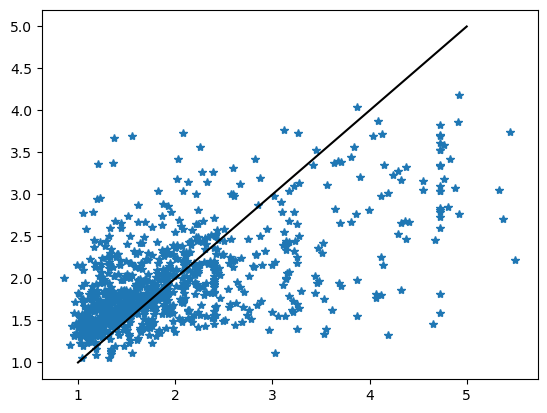

In [32]:
import matplotlib.pyplot as plt

plt.plot(Y_cal,y_cv,'*')
plt.plot([1,5],[1,5],'k')

# Template for testing

In [34]:
## After choosing No. LVs and variables
## X_cal should now only included wanted variables

n_comp = 7 # Replace with best value

scaler = StandardScaler()

X_cal_norm = scaler.fit_transform(X_cal) # this saves mean and std to scaler 

model = PLSRegression(n_components=n_comp)

model.fit(X_cal_norm,Y_cal) # Calculate pls model for calibration data

## predict

X_test_norm = scaler.transform(X_test) # this uses previously computed mean and std
Y_pred = model.predict(X_test_norm) # Calculate test data with precalculated model

# model parameters can be accessed for example
loadings = model.x_loadings_
